# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

Pre-owned vehicles constitute a substantial industry, influenced by various elements determining the relative worth of one used car compared to another. To optimize earnings, a pre-owned car dealership must maintain a stock of vehicles equipped with sought-after attributes and priced competitively.Therefore analyze the data and provide clear reccommendation to clients

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [56]:
# Referenced Python libraries
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import statsmodels.graphics.tsaplots as tsplots
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_blobs
from sklearn.linear_model import LinearRegression, HuberRegressor, Lasso, Ridge
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import set_config
import warnings
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, OrdinalEncoder

warnings.filterwarnings('ignore')

The dataset in use provides extensive details on a multitude of used car transactions.'Title_status' predominantly registers as 'clean,' potentially justifying its exclusion due to limited informative value.Numerous categorical features exist, some necessitating one-hot encoding (e.g., 'Fuel'), while others could be converted into ordinal values (e.g., 'Condition'). Categorical variables with an extensive range of values may require unique handling on a case-by-case basis.Notably, price doesn't consistently correlate with profits. It would be beneficial to gather data on the purchase prices of cars by dealerships to discern which vehicles yield higher profits."


In [34]:
cars = pd.read_csv('/Users/shaikali/Desktop/PCMLAI/Module11/practical_application_II_starter/data/vehicles.csv')
cars.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [35]:
#Check column title
cars.columns


Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

In [36]:
#understand data
cars.head()


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [37]:
#Find null value count for each column
cars.isnull().sum()


id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [38]:
cars.describe()


,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [39]:
cars.describe(include = ['object'])


,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,state
count,426880,409234,421603,252776,249202,423867,418638,424324,265838,296313,120519,334022,296677,426880
unique,404,42,29649,6,8,5,6,3,118246,3,4,13,12,51
top,columbus,ford,f-150,good,6 cylinders,gas,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,ca
freq,3608,70985,8009,121456,94169,356209,405117,336524,261,131904,63465,87056,79285,50614


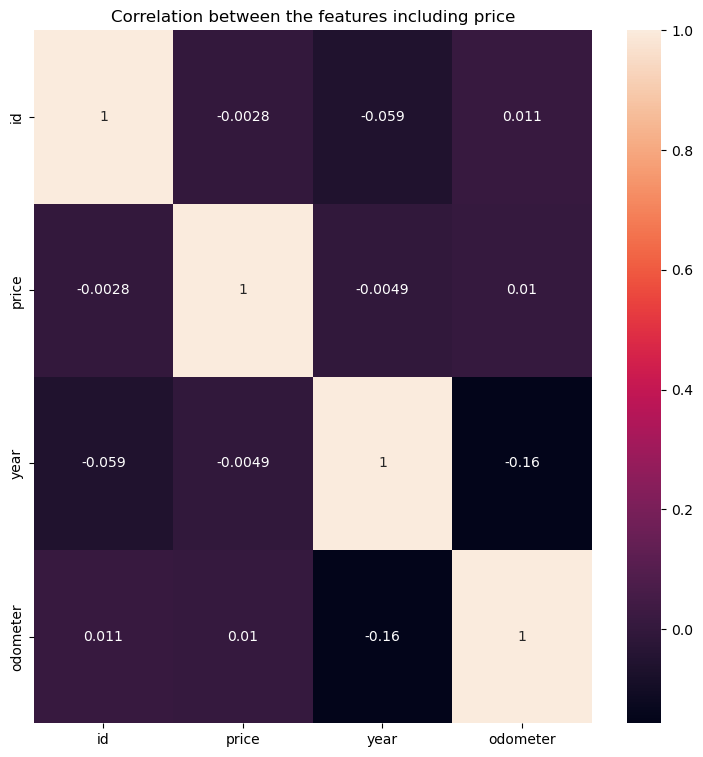

In [40]:
#Describe data and visualize it
cars.corr()
plt.figure(figsize=(9,9))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation between the features including price')
plt.show()

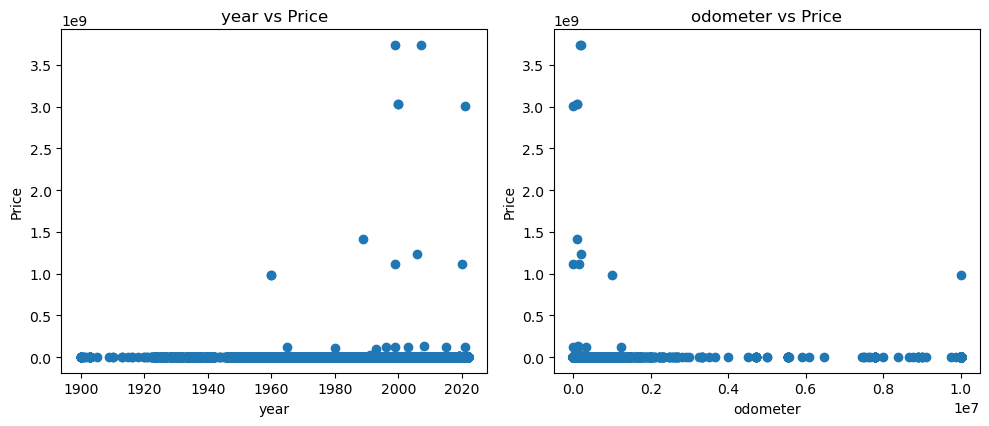

In [41]:
#Visualize 
def scat(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(cars[x],cars['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scat('year', 1)
scat('odometer', 2)


plt.tight_layout()

Lesser the numbers on odometer, the more the price and positive correlation with Car year

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [42]:
#to examine value count for specific column
cars['region'].value_counts()

columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: region, Length: 404, dtype: int64

### DROP Missing Values

In [43]:
#Several columns have to be dropped and have missing values dealt with
#drop the following columns
cars.drop(columns = ['id', 'title_status', 'VIN', 'model', 'size', 'region'], inplace = True )


In [44]:
cars['manufacturer'].dropna(inplace = True)
cars['year'].fillna(cars['year'].median(), inplace = True)
cars['fuel'].fillna(cars['fuel'].value_counts().index[0], inplace = True)
cars['odometer'].fillna(cars['odometer'].mean(), inplace = True)
cars['transmission'].fillna(cars['transmission'].value_counts().index[0], inplace = True)
cars['paint_color'].fillna(cars['paint_color'].value_counts().index[0], inplace = True)

In [45]:
cars = cars[cars['cylinders'] != 'other']
cars['cylinders'].fillna(0, inplace = True)
cars = cars[cars['drive'].notna()]
cars = cars[cars['manufacturer'].notna()]
cars = cars[cars['type'].notna()]

In [46]:
cars.drop(cars[cars['price'] == 0].index, inplace = True)


In [47]:
cars.drop(cars[cars['price'] > 100000].index, inplace = True)


In [49]:
cars.drop(cars[cars['year'] < 1990].index, inplace = True)
cars.drop(cars[cars['odometer'] > 200000].index, inplace = True)
cars.dropna(inplace = True)
cars.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 144871 entries, 31 to 426879
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         144871 non-null  int64  
 1   year          144871 non-null  float64
 2   manufacturer  144871 non-null  object 
 3   condition     144871 non-null  object 
 4   cylinders     144871 non-null  object 
 5   fuel          144871 non-null  object 
 6   odometer      144871 non-null  float64
 7   transmission  144871 non-null  object 
 8   drive         144871 non-null  object 
 9   type          144871 non-null  object 
 10  paint_color   144871 non-null  object 
 11  state         144871 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 14.4+ MB


In [50]:
#give numbers to cylinders
## replace cylinders with numbers
cars['cylinders'] = cars['cylinders'].replace(['0'], 0)
cars['cylinders'] = cars['cylinders'].replace(['3 cylinders'], 3)
cars['cylinders'] = cars['cylinders'].replace(['4 cylinders'], 4)
cars['cylinders'] = cars['cylinders'].replace(['5 cylinders'], 5)
cars['cylinders'] = cars['cylinders'].replace(['6 cylinders'], 6)
cars['cylinders'] = cars['cylinders'].replace(['8 cylinders'], 8)
cars['cylinders'] = cars['cylinders'].replace(['10 cylinders'], 10)
cars['cylinders'] = cars['cylinders'].replace(['12 cylinders'], 12)
cars.loc[cars['cylinders'] == 0  , 'cylinders'] = 6
cars['cylinders'].unique()
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144871 entries, 31 to 426879
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         144871 non-null  int64  
 1   year          144871 non-null  float64
 2   manufacturer  144871 non-null  object 
 3   condition     144871 non-null  object 
 4   cylinders     144871 non-null  int64  
 5   fuel          144871 non-null  object 
 6   odometer      144871 non-null  float64
 7   transmission  144871 non-null  object 
 8   drive         144871 non-null  object 
 9   type          144871 non-null  object 
 10  paint_color   144871 non-null  object 
 11  state         144871 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 14.4+ MB


In [51]:
# take a random sample from dataset and make a plot
cars_params = cars[['price', 'year', 'odometer']]
cars_sample = cars_params.sample(n = 100, random_state = 1)
cars_sample.head()

,price,year,odometer
194594,18995,2017.0,43406.0
145771,19995,2013.0,145207.0
175158,17990,2017.0,20909.0
52019,11338,2014.0,101905.0
166818,22999,2007.0,80466.0


In [63]:
cars_refined = pd.get_dummies(cars,columns = ['fuel', 'transmission', 'drive'])
cars_refined = cars_refined.reset_index()
cars_refined.info(verbose = True)
cars_refined.drop(columns = 'index', inplace= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144871 entries, 0 to 144870
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   index                   144871 non-null  int64  
 1   price                   144871 non-null  int64  
 2   year                    144871 non-null  float64
 3   manufacturer            144871 non-null  object 
 4   condition               144871 non-null  object 
 5   cylinders               144871 non-null  int64  
 6   odometer                144871 non-null  float64
 7   type                    144871 non-null  object 
 8   paint_color             144871 non-null  object 
 9   state                   144871 non-null  object 
 10  fuel_diesel             144871 non-null  uint8  
 11  fuel_electric           144871 non-null  uint8  
 12  fuel_gas                144871 non-null  uint8  
 13  fuel_hybrid             144871 non-null  uint8  
 14  fuel_other          

In [64]:
#encoding for unique values
from sklearn.preprocessing import LabelEncoder
labeled_cols = ['manufacturer', 'paint_color', 'state', 'type']
cars_refined[labeled_cols] = cars_refined[labeled_cols].apply(LabelEncoder().fit_transform)
cars_refined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144871 entries, 0 to 144870
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   price                   144871 non-null  int64  
 1   year                    144871 non-null  float64
 2   manufacturer            144871 non-null  int64  
 3   condition               144871 non-null  object 
 4   cylinders               144871 non-null  int64  
 5   odometer                144871 non-null  float64
 6   type                    144871 non-null  int64  
 7   paint_color             144871 non-null  int64  
 8   state                   144871 non-null  int64  
 9   fuel_diesel             144871 non-null  uint8  
 10  fuel_electric           144871 non-null  uint8  
 11  fuel_gas                144871 non-null  uint8  
 12  fuel_hybrid             144871 non-null  uint8  
 13  fuel_other              144871 non-null  uint8  
 14  transmission_automat

In [65]:
#  Encoding for Conditions 
condition = ['salvage', 'fair', 'good', 'excellent', 'like new', 'new']
enc = OrdinalEncoder(categories = [condition], dtype = int)
cars_refined['condition'] = enc.fit_transform(cars[['condition']])
cars_refined.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144871 entries, 0 to 144870
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   price                   144871 non-null  int64  
 1   year                    144871 non-null  float64
 2   manufacturer            144871 non-null  int64  
 3   condition               144871 non-null  int64  
 4   cylinders               144871 non-null  int64  
 5   odometer                144871 non-null  float64
 6   type                    144871 non-null  int64  
 7   paint_color             144871 non-null  int64  
 8   state                   144871 non-null  int64  
 9   fuel_diesel             144871 non-null  uint8  
 10  fuel_electric           144871 non-null  uint8  
 11  fuel_gas                144871 non-null  uint8  
 12  fuel_hybrid             144871 non-null  uint8  
 13  fuel_other              144871 non-null  uint8  
 14  transmission_automat

In [66]:
cars_refined.head()

,price,year,manufacturer,condition,cylinders,odometer,type,paint_color,state,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,transmission_automatic,transmission_manual,transmission_other,drive_4wd,drive_fwd,drive_rwd
0,15000,2013.0,12,3,6,128000.0,10,0,1,0,0,1,0,0,1,0,0,0,0,1
1,27990,2012.0,13,2,8,68696.0,8,0,1,0,0,1,0,0,0,0,1,1,0,0
2,34590,2016.0,7,2,6,29499.0,8,9,1,0,0,1,0,0,0,0,1,1,0,0
3,35000,2019.0,37,3,6,43000.0,10,5,1,0,0,1,0,0,1,0,0,1,0,0
4,29990,2016.0,7,2,6,17302.0,8,8,1,0,0,1,0,0,0,0,1,1,0,0


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [ ]:
I have used the following Modeling Techniques
Modeling Technique:

Regression: Liner, Ridge, Lasso
Scaler: SequentialFeatureSelector, Standard Scaler
GrideSearchCV
ridge__alpha

# Linear Regression

In [67]:
X = ''
y = ''
all_features_linreg = ''
linreg_mse = ''
data_model=cars_refined.copy()
X = pd.get_dummies(data_model.drop('price', axis = 1))
y = data_model['price']
all_features_linreg = LinearRegression(fit_intercept=False).fit(X, y)
linreg_mse = mean_squared_error(all_features_linreg.predict(X), y)

print(f'LinearRegression: MSE All features: {linreg_mse}')
print(f'LinearRegression: Coef_ All features: {all_features_linreg.coef_}')


LinearRegression: MSE All features: 60602284.22739094
LinearRegression: Coef_ All features: [ 8.88531851e+02  2.14502310e+01  3.43639549e+02  2.13020554e+03
 -7.20391596e-02  1.73737330e+01 -1.91488360e+00 -1.12868732e+01
 -3.99382684e+05 -4.10758801e+05 -4.12722509e+05 -4.12824431e+05
 -4.10634817e+05 -6.83679899e+05 -6.81125661e+05 -6.81517682e+05
 -6.79787509e+05 -6.86175530e+05 -6.80360203e+05]


Observed high MSA, printing the correlation

In [69]:
pd.set_option('display.max_rows', 200)
price_corr = cars_refined.corrwith(cars_refined['price'])
print(price_corr)



price                     1.000000
year                      0.573961
manufacturer             -0.048122
condition                -0.058223
cylinders                 0.346602
odometer                 -0.579189
type                      0.044952
paint_color               0.042844
state                    -0.015047
fuel_diesel               0.230155
fuel_electric             0.050186
fuel_gas                 -0.284035
fuel_hybrid              -0.033247
fuel_other                0.198862
transmission_automatic   -0.345712
transmission_manual      -0.083239
transmission_other        0.412731
drive_4wd                 0.205704
drive_fwd                -0.326374
drive_rwd                 0.143142
dtype: float64


# CROSS VALIDATION

In [73]:
# Features and Target
features = cars_refined.drop(columns = ['price'])
# features = cars[['condition', 'odometer', 'cylinders', 'year']]
features.head()
price = cars_refined.price

#scale the data
object = StandardScaler()
features_scaled = pd.DataFrame(object.fit_transform(features), columns = features.columns)
print(type(features))
print(type(features_scaled))

#create training and tetsing data
X = features_scaled
y = price
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=22)


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [74]:
#Simple Linear Regrssion Model
lr = LinearRegression().fit(X_train, y_train)
model_1_train_mse = mean_squared_error(y_train, lr.predict(X_train))
model_1_test_mse = mean_squared_error(y_test, lr.predict(X_test))
print(f'Train MSE: {model_1_train_mse: .2f}')
print(f'Test MSE: {model_1_test_mse: .2f}')

Train MSE:  60258177.00
Test MSE:  61420620.89


In [77]:
print(list(zip(lr.coef_, X)))
# Examining the coefficients
coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",lr.coef_.transpose())
coef_table.sort_values('Coefs')

[(5107.4356943499715, 'year'), (229.84430721449417, 'manufacturer'), (287.00306083368866, 'condition'), (2982.2393311196893, 'cylinders'), (-3923.923274057463, 'odometer'), (47.14398903182949, 'type'), (-19.897796235260245, 'paint_color'), (-150.61527702005412, 'state'), (-2938679014603572.0, 'fuel_diesel'), (-1073025959209207.5, 'fuel_electric'), (-4853561650184589.0, 'fuel_gas'), (-1798386335023053.2, 'fuel_hybrid'), (-3561116293586304.5, 'fuel_other'), (-864558261581988.6, 'transmission_automatic'), (-419184139367777.75, 'transmission_manual'), (-808712020927766.5, 'transmission_other'), (1707852124395739.8, 'drive_4wd'), (1697570625114138.8, 'drive_fwd'), (1416293142270105.5, 'drive_rwd')]


In [80]:
from sklearn.inspection import permutation_importance

r = permutation_importance(lr, X_test, y_test , n_repeats=30,random_state=0)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{X.columns[i]:<8}"
        f"  {r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

fuel_gas  280689290914303142002688.000 +/- 1448404793542030393344.000
fuel_other  148518923423823152807936.000 +/- 798362582810387283968.000
fuel_diesel  105777424852372382810112.000 +/- 493939765675873533952.000
fuel_hybrid  39281893506618461519872.000 +/- 196909164814115667968.000
drive_4wd  34619213433616870670336.000 +/- 173543485836699336704.000
drive_fwd  34299747686422713204736.000 +/- 168575140059739488256.000
drive_rwd  23868876109600859881472.000 +/- 121541290815922110464.000
fuel_electric  12913936905318550208512.000 +/- 48203585335547232256.000
transmission_automatic  8837746517165532512256.000 +/- 40822321378066497536.000
transmission_other  7735666014662814597120.000 +/- 28663173265090576384.000
transmission_manual  2043671865757810556928.000 +/- 9539129503078533120.000
year      0.308 +/- 0.003
odometer  0.183 +/- 0.002
cylinders  0.106 +/- 0.001
condition  0.001 +/- 0.000
manufacturer  0.001 +/- 0.000
state     0.000 +/- 0.000
type      0.000 +/- 0.000


The results convey that 4 WD and auto transimission scores the best

# RIDGE REGRESSION

In [81]:
X = ''
y = ''

data_model=cars_refined.copy()
X = pd.get_dummies(data_model.drop('price', axis = 1))
y = data_model['price']

# Simple Ridge Regression
ridgemodel = Ridge().fit(X_train, y_train)
train_mse = mean_squared_error(y_train, ridgemodel.predict(X_train))
test_mse = mean_squared_error(y_test, ridgemodel.predict(X_test))
ridgemodel_coefs = ridgemodel.coef_
print(f'Ridge Regression: MSE All features: {train_mse}')
print(f'Ridge Regression: MSE All features: {test_mse}')
print(f'Ridge Regression: Coef_ All features: {ridgemodel_coefs}')
#print("cross_val_score=",cross_val_score(ridgemodel, X_train, y_train, cv=5, scoring='neg_me

Ridge Regression: MSE All features: 60254993.5820269
Ridge Regression: MSE All features: 61419706.454627894
Ridge Regression: Coef_ All features: [ 5074.68042473   243.175892     246.63729722  2981.02652617
 -3929.48043444    49.18331948   -19.50204397  -151.15477254
  2112.86486161   -68.06252616  -984.0179798   -392.25050955
  -183.81561458  -525.41757599   297.06149588   407.72318699
  1233.63035068 -1895.85342717   784.78588666]


# Ridge Regression with Standard Scaler and GridSearchCV

In [83]:
# Ridge Regression with standard Scaler and GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

ridge_param_dict = {'ridge__alpha': np.logspace(0.1, 1, 50, 100)}
ridge_pipe = Pipeline([('scaler', StandardScaler()), 
                      ('ridge', Ridge())])
ridge_grid = GridSearchCV(ridge_pipe, param_grid=ridge_param_dict,scoring = 'neg_root_mean_squared_error')
ridge_grid.fit(X_train, y_train)
ridge_train_preds = ridge_grid.predict(X_train)
ridge_test_preds = ridge_grid.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_train_preds)
ridge_test_mse = mean_squared_error(y_test, ridge_test_preds)

print(f'Ridge Regression with StandardScaler Train MSE: {ridge_train_mse}')
print(f'Ridge Regression with StandardScaler Test MSE: {ridge_test_mse}')
#print("cross_val_score=",cross_val_score(ridge_pipe, X_train, y_train, cv=5, scoring='neg_mean_absolute_error').mean())
ridge_pipe

Ridge Regression with StandardScaler Train MSE: 60274702.407019064
Ridge Regression with StandardScaler Test MSE: 61921471.70591732


Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge())])

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

1. Post-modeling analysis is essential to discern the efficacy of our model and extract valuable insights.

2. We must align our objectives with the goal of unraveling the factors influencing used car prices.

3. Our task now involves condensing our findings and evaluating whether prior phases necessitate reevaluation and adjustment or if we've gleaned information of significance to present to the client.

4. The modeling phase presented unforeseen challenges. Due to certain columns lending themselves to one-hot encoding, our dataframe expanded beyond the processing capacity of a standard home laptop, limited to 20 columns with less-than-ideal labels.

5. Modeling outcomes exhibited inconsistencies, characterized by substantial errors. 


6. Notably, factors such as lower odometer readings, newer vehicle models, and increased cylinder count exhibited a positive correlation with price. 

7. Some additional features played a role, notably the preference for automatic transmissions.

8. However, our confidence in providing further valuable insights from the current dataset is limited. 

9. We recommend collecting additional data that may exhibit stronger correlations with price, such as horsepower or fuel efficiency. 

10. Another ambiguity lies in distinguishing vehicles that generate the most profit from those with the highest selling prices, a crucial distinction for used car dealers.



11. Data Assessment: Augmenting the dataset with more records would enhance the quality of our results.

12. Key Observations:
   - The vehicle's year positively correlates with its price.
   - Odometer readings negatively impact price; lower mileage yields higher prices.
   - Sedan-type cars, despite being the most sold, fetch lower average prices.

13. Model Insights:
   - Simple Linear Regression with dummy encoding of the 'manufacturer' column yielded the best results.
   - Simple Linear Regression with all features emerged as the top model for price prediction.

14. Review Process:
   - Following submission, the assignment will undergo evaluation by the course instructor.

15. Next Steps:
   - With increased computational resources, exploration of a larger dataset becomes feasible.


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In my effort to optimize profits from used car sales through data collection and analysis, 
I have gained some insights. However, I acknowledge the need for more comprehensive data, particularly
regarding past car sales profitability, which could be obtained by tracking dealers' 
purchase prices. From the available data, certain trends are evident: buyers are willing to pay higher
prices for newer cars with lower odometer readings, automatic transmissions, and electric or hybrid vehicles. 
While other factors play a role in pricing and customer interest, their influence remains uncertain. 
Therefore, I recommend ongoing data collection to identify additional features that drive customer interest and,
consequently, higher profits, enhancing my predictive models.

